# Quick Data Inspection

Simple notebook to take a quick look at the downloaded Deribit BTC data.

In [1]:
import pandas as pd
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [ ]:
# Define data paths
options_path = Path('../raw/options/feather/deribit/BTC')

print("=== DATA OVERVIEW ===")

print("\n--- OPTIONS ---")

if not options_path.exists():
    print("No options data found")
else:
    files = sorted(list(options_path.glob('*.feather')))
    if not files:
        print("No options files found")
    else:
        print(f"Files: {len(files)} ({files[0].stem} to {files[-1].stem})")
        
        # Load a sample file from the middle
        sample_file = files[len(files)//2]
        df = pd.read_feather(sample_file)
        
        print(f"Sample file: {sample_file.name}")
        print(f"   Rows: {len(df):,}")
        print(f"   Columns: {list(df.columns)}")
        
        if 'timestamp' in df.columns:
            df['datetime'] = pd.to_datetime(df['timestamp'], unit='us', utc=True)
            print(f"   Time range: {df['datetime'].min()} to {df['datetime'].max()}")
        
        if 'price' in df.columns:
            print(f"   Price range: ${df['price'].min():.4f} - ${df['price'].max():.4f}")
        
        if 'instrument' in df.columns:
            print(f"   Instruments: {df['instrument'].nunique()} unique")
            print(f"   Top 3: {df['instrument'].value_counts().head(3).index.tolist()}")

=== DATA OVERVIEW ===

--- OPTIONS ---
📁 Files: 128 (2019-03-30 to 2019-08-04)
📊 Sample file: 2019-06-02.feather
   Rows: 608
   Columns: ['timestamp', 'id', 'price', 'quantity', 'is_buyer_maker', 'instrument', 'iv', 'mark_price', 'index_price']
   Time range: 2019-06-02 00:14:55.191000+00:00 to 2019-06-02 23:26:38.593000+00:00
   Price range: $0.0005 - $0.6200
   Instruments: 98 unique
   Top 3: ['BTC-28JUN19-8500-P', 'BTC-7JUN19-9000-C', 'BTC-28JUN19-10000-C']


In [3]:
# Load and display sample data (if options exist)
if options_path.exists():
    files = sorted(list(options_path.glob('*.feather')))
    if files:
        print("=== SAMPLE OPTIONS DATA ===")
        
        # Load middle file
        sample_file = files[len(files)//2]
        df = pd.read_feather(sample_file)
        df['datetime'] = pd.to_datetime(df['timestamp'], unit='us', utc=True)
        
        print(f"\nFirst 10 rows from {sample_file.name}:")
        display(df.head(10))
        
        print(f"\nBasic statistics:")
        display(df[['price', 'quantity', 'iv', 'mark_price', 'index_price']].describe())

=== SAMPLE OPTIONS DATA ===

First 10 rows from 2019-06-02.feather:


,timestamp,id,price,quantity,is_buyer_maker,instrument,iv,mark_price,index_price,datetime
0,1559434495191000,22906514,0.0540,1.0,True,BTC-28JUN19-9500-C,84.68,0.054109,8571.17,2019-06-02 00:14:55.191000+00:00
1,1559434541346000,22906522,0.0410,10.0,True,BTC-28JUN19-10000-C,86.88,0.039273,8573.82,2019-06-02 00:15:41.346000+00:00
2,1559434607859000,22906529,0.0415,7.5,True,BTC-28JUN19-10000-C,87.48,0.039207,8572.01,2019-06-02 00:16:47.859000+00:00
3,1559434615655000,22906530,0.0415,2.5,False,BTC-28JUN19-10000-C,87.49,0.039198,8571.60,2019-06-02 00:16:55.655000+00:00
4,1559434652119000,22906531,0.0420,2.0,True,BTC-28JUN19-10000-C,87.99,0.039232,8572.45,2019-06-02 00:17:32.119000+00:00
5,1559434895714000,22906588,0.0760,1.0,True,BTC-28JUN19-9000-C,87.02,0.073582,8567.19,2019-06-02 00:21:35.714000+00:00
6,1559434936380000,22906592,0.0790,1.0,False,BTC-28JUN19-8500-P,82.41,0.081465,8566.91,2019-06-02 00:22:16.380000+00:00
7,1559435491581000,22906672,0.2815,0.1,False,BTC-27SEP19-7000-C,80.27,0.288771,8569.51,2019-06-02 00:31:31.581000+00:00
8,1559435966127000,22906824,0.0490,0.1,True,BTC-27DEC19-22000-C,93.65,0.045794,8586.15,2019-06-02 00:39:26.127000+00:00
9,1559435976035000,22906831,0.0700,0.1,True,BTC-27SEP19-13000-C,86.27,0.068186,8586.15,2019-06-02 00:39:36.035000+00:00



Basic statistics:


,price,quantity,iv,mark_price,index_price
count,608.000000,608.000000,608.000000,608.000000,608.000000
mean,0.048432,3.135197,87.181645,0.048496,8696.137319
std,0.054854,6.445578,11.044486,0.054458,69.684565
min,0.000500,0.100000,0.000000,0.000598,8553.670000
25%,0.012000,0.300000,82.727500,0.012158,8665.047500
50%,0.031500,1.000000,86.135000,0.031716,8707.240000
75%,0.071000,3.650000,89.717500,0.070485,8738.557500
max,0.620000,97.000000,144.700000,0.612430,8832.830000


=== SIMPLE VISUALIZATION ===


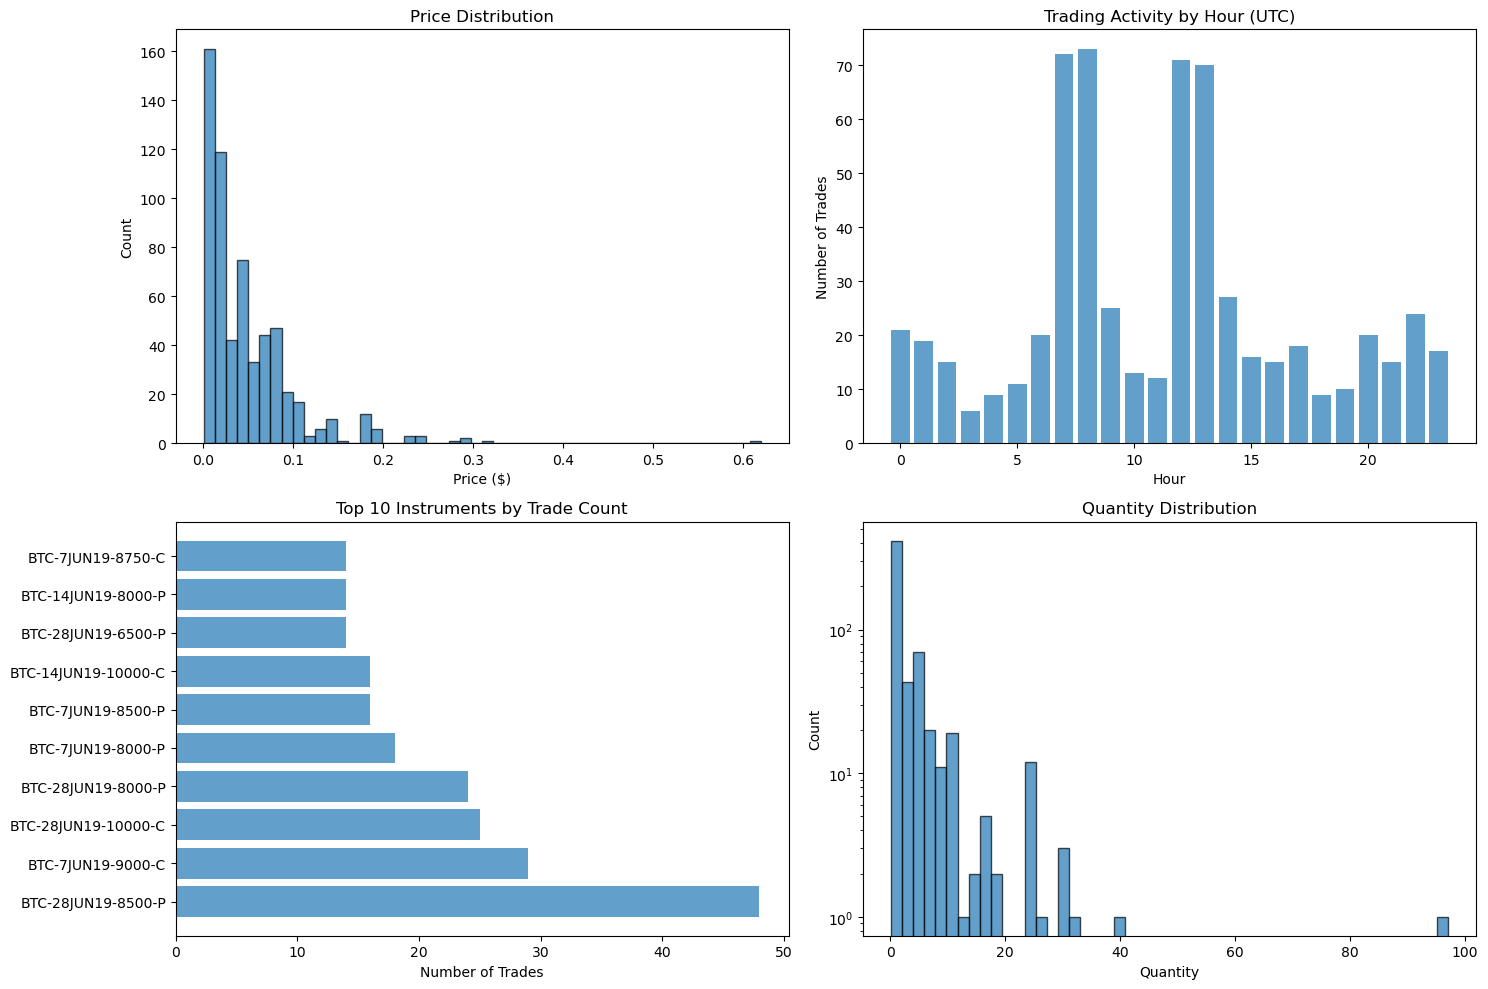


Sample from 2019-06-02.feather (608 trades)


In [4]:
# Simple visualization (if data exists)
if options_path.exists():
    files = sorted(list(options_path.glob('*.feather')))
    if files and len(files) > 0:
        print("=== SIMPLE VISUALIZATION ===")
        
        # Load sample file
        sample_file = files[len(files)//2]
        df = pd.read_feather(sample_file)
        df['datetime'] = pd.to_datetime(df['timestamp'], unit='us', utc=True)
        
        # Create simple plots
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        
        # Price distribution
        ax1.hist(df['price'], bins=50, alpha=0.7, edgecolor='black')
        ax1.set_title('Price Distribution')
        ax1.set_xlabel('Price ($)')
        ax1.set_ylabel('Count')
        
        # Trading activity over time
        df['hour'] = df['datetime'].dt.hour
        hourly_counts = df['hour'].value_counts().sort_index()
        ax2.bar(hourly_counts.index, hourly_counts.values, alpha=0.7)
        ax2.set_title('Trading Activity by Hour (UTC)')
        ax2.set_xlabel('Hour')
        ax2.set_ylabel('Number of Trades')
        
        # Top instruments
        top_instruments = df['instrument'].value_counts().head(10)
        ax3.barh(range(len(top_instruments)), top_instruments.values, alpha=0.7)
        ax3.set_yticks(range(len(top_instruments)))
        ax3.set_yticklabels(top_instruments.index)
        ax3.set_title('Top 10 Instruments by Trade Count')
        ax3.set_xlabel('Number of Trades')
        
        # Quantity distribution
        ax4.hist(df['quantity'], bins=50, alpha=0.7, edgecolor='black')
        ax4.set_title('Quantity Distribution')
        ax4.set_xlabel('Quantity')
        ax4.set_ylabel('Count')
        ax4.set_yscale('log')  # Log scale for better visibility
        
        plt.tight_layout()
        plt.show()
        
        print(f"\nSample from {sample_file.name} ({len(df):,} trades)")